# Bisection Method for Root Finding

## Introduction

The **bisection method** is one of the simplest and most robust numerical techniques for finding roots of continuous functions. It is based on the **Intermediate Value Theorem**, which guarantees that if a continuous function $f(x)$ changes sign over an interval $[a, b]$, then there exists at least one root $r$ such that $f(r) = 0$ within that interval.

## Theoretical Foundation

### The Intermediate Value Theorem

Let $f: [a, b] \to \mathbb{R}$ be a continuous function. If $f(a) \cdot f(b) < 0$, then there exists at least one $c \in (a, b)$ such that:

$$f(c) = 0$$

### Algorithm Description

The bisection method iteratively halves the interval $[a, b]$ and selects the subinterval where the sign change occurs:

1. Compute the midpoint: $c = \frac{a + b}{2}$

2. Evaluate $f(c)$

3. Determine the new interval:
   - If $f(a) \cdot f(c) < 0$, set $b = c$
   - Otherwise, set $a = c$

4. Repeat until $|b - a| < \epsilon$ or $|f(c)| < \delta$

### Convergence Analysis

After $n$ iterations, the interval width is:

$$|b_n - a_n| = \frac{b_0 - a_0}{2^n}$$

The error bound for the root approximation $c_n$ is:

$$|c_n - r| \leq \frac{b_0 - a_0}{2^{n+1}}$$

where $r$ is the true root. This gives us **linear convergence** with a guaranteed reduction of the error by half at each iteration.

### Number of Iterations Required

To achieve an accuracy of $\epsilon$, we need $n$ iterations where:

$$n \geq \frac{\ln(b_0 - a_0) - \ln(\epsilon)}{\ln 2} = \log_2\left(\frac{b_0 - a_0}{\epsilon}\right)$$

## Implementation

We will implement the bisection method and demonstrate it on the function:

$$f(x) = x^3 - x - 2$$

This function has a root near $x \approx 1.52$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def bisection_method(f, a, b, tol=1e-10, max_iter=100):
    """
    Find a root of f(x) = 0 using the bisection method.
    
    Parameters:
    -----------
    f : callable
        The function for which we seek a root
    a, b : float
        Initial interval endpoints where f(a) and f(b) have opposite signs
    tol : float
        Tolerance for convergence
    max_iter : int
        Maximum number of iterations
        
    Returns:
    --------
    root : float
        Approximation of the root
    iterations : list
        History of (a, b, c, f(c)) for each iteration
    """
    # Verify initial conditions
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs")
    
    iterations = []
    
    for i in range(max_iter):
        c = (a + b) / 2
        fc = f(c)
        
        iterations.append({
            'iteration': i + 1,
            'a': a,
            'b': b,
            'c': c,
            'f(c)': fc,
            'interval_width': b - a
        })
        
        # Check convergence
        if abs(fc) < tol or (b - a) / 2 < tol:
            return c, iterations
        
        # Update interval
        if f(a) * fc < 0:
            b = c
        else:
            a = c
    
    return c, iterations

## Example: Finding the Root of $f(x) = x^3 - x - 2$

In [2]:
# Define the function
def f(x):
    return x**3 - x - 2

# Initial interval [1, 2]
a, b = 1.0, 2.0

# Verify sign change
print(f"f({a}) = {f(a):.4f}")
print(f"f({b}) = {f(b):.4f}")
print(f"Sign change: {f(a) * f(b) < 0}")

# Find the root
root, history = bisection_method(f, a, b, tol=1e-10)

print(f"\nRoot found: x = {root:.10f}")
print(f"f(root) = {f(root):.2e}")
print(f"Number of iterations: {len(history)}")

f(1.0) = -2.0000
f(2.0) = 4.0000
Sign change: True

Root found: x = 1.5213797068
f(root) = -3.28e-11
Number of iterations: 33


## Convergence History

In [3]:
# Display iteration history
print("Iteration | a          | b          | c          | f(c)       | Width")
print("-" * 75)

for h in history[:15]:  # Show first 15 iterations
    print(f"{h['iteration']:^9} | {h['a']:.8f} | {h['b']:.8f} | {h['c']:.8f} | {h['f(c)']:+.2e} | {h['interval_width']:.2e}")

Iteration | a          | b          | c          | f(c)       | Width
---------------------------------------------------------------------------
    1     | 1.00000000 | 2.00000000 | 1.50000000 | -1.25e-01 | 1.00e+00
    2     | 1.50000000 | 2.00000000 | 1.75000000 | +1.61e+00 | 5.00e-01
    3     | 1.50000000 | 1.75000000 | 1.62500000 | +6.66e-01 | 2.50e-01
    4     | 1.50000000 | 1.62500000 | 1.56250000 | +2.52e-01 | 1.25e-01
    5     | 1.50000000 | 1.56250000 | 1.53125000 | +5.91e-02 | 6.25e-02
    6     | 1.50000000 | 1.53125000 | 1.51562500 | -3.41e-02 | 3.12e-02
    7     | 1.51562500 | 1.53125000 | 1.52343750 | +1.23e-02 | 1.56e-02
    8     | 1.51562500 | 1.52343750 | 1.51953125 | -1.10e-02 | 7.81e-03
    9     | 1.51953125 | 1.52343750 | 1.52148438 | +6.22e-04 | 3.91e-03
   10     | 1.51953125 | 1.52148438 | 1.52050781 | -5.18e-03 | 1.95e-03
   11     | 1.52050781 | 1.52148438 | 1.52099609 | -2.28e-03 | 9.77e-04
   12     | 1.52099609 | 1.52148438 | 1.52124023 | -8.29e-04 |

## Visualization

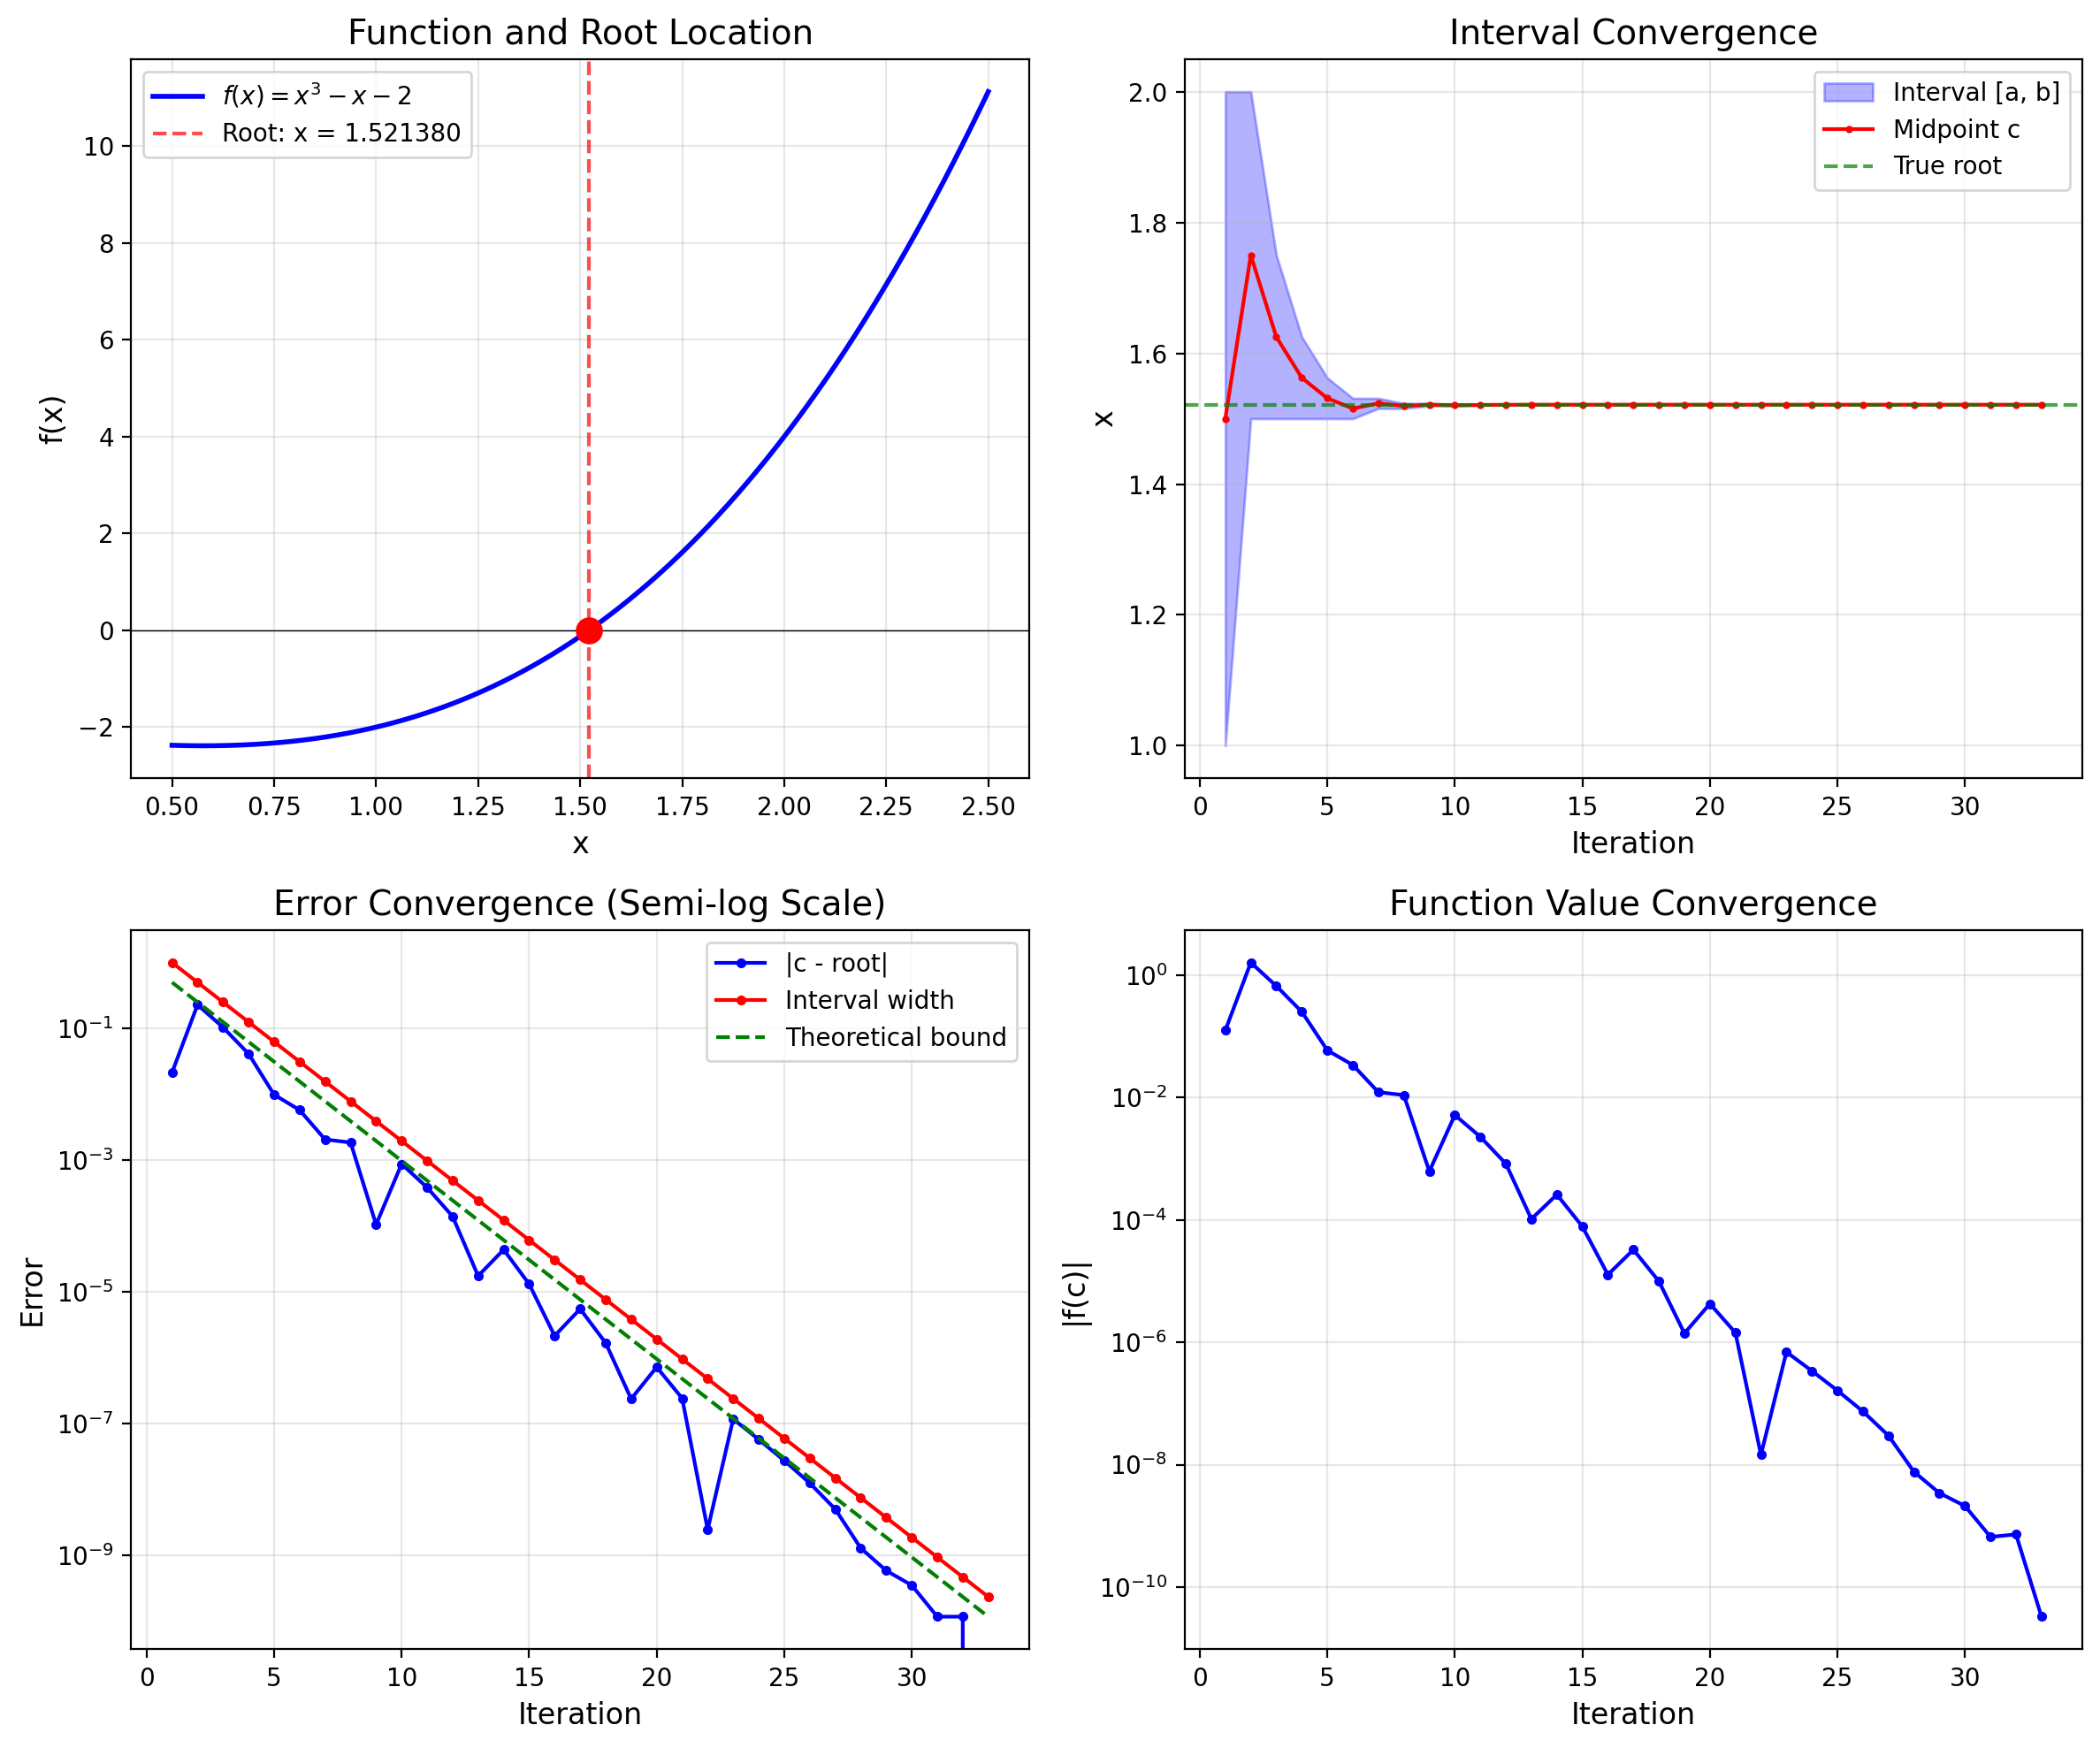


Plot saved to 'plot.png'


In [4]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Function and root location
ax1 = axes[0, 0]
x = np.linspace(0.5, 2.5, 500)
y = f(x)

ax1.plot(x, y, 'b-', linewidth=2, label=r'$f(x) = x^3 - x - 2$')
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=root, color='r', linestyle='--', alpha=0.7, label=f'Root: x = {root:.6f}')
ax1.plot(root, 0, 'ro', markersize=10)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('f(x)', fontsize=12)
ax1.set_title('Function and Root Location', fontsize=14)
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Plot 2: Interval narrowing
ax2 = axes[0, 1]
iterations = [h['iteration'] for h in history]
a_vals = [h['a'] for h in history]
b_vals = [h['b'] for h in history]
c_vals = [h['c'] for h in history]

ax2.fill_between(iterations, a_vals, b_vals, alpha=0.3, color='blue', label='Interval [a, b]')
ax2.plot(iterations, c_vals, 'r.-', markersize=4, label='Midpoint c')
ax2.axhline(y=root, color='g', linestyle='--', alpha=0.7, label='True root')
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('x', fontsize=12)
ax2.set_title('Interval Convergence', fontsize=14)
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# Plot 3: Error convergence (semi-log)
ax3 = axes[1, 0]
errors = [abs(h['c'] - root) for h in history]
widths = [h['interval_width'] for h in history]

ax3.semilogy(iterations, errors, 'b.-', markersize=6, label='|c - root|')
ax3.semilogy(iterations, widths, 'r.-', markersize=6, label='Interval width')

# Theoretical bound
theoretical = [(b - a) / (2**(n+1)) for n in range(len(history))]
ax3.semilogy(iterations, theoretical, 'g--', linewidth=1.5, label='Theoretical bound')

ax3.set_xlabel('Iteration', fontsize=12)
ax3.set_ylabel('Error', fontsize=12)
ax3.set_title('Error Convergence (Semi-log Scale)', fontsize=14)
ax3.legend(loc='upper right')
ax3.grid(True, alpha=0.3)

# Plot 4: |f(c)| convergence
ax4 = axes[1, 1]
fc_vals = [abs(h['f(c)']) for h in history]

ax4.semilogy(iterations, fc_vals, 'b.-', markersize=6)
ax4.set_xlabel('Iteration', fontsize=12)
ax4.set_ylabel('|f(c)|', fontsize=12)
ax4.set_title('Function Value Convergence', fontsize=14)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('bisection_method_root_finding_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Convergence Rate Analysis

The bisection method exhibits **linear convergence**. We can verify this by examining the ratio of successive errors:

In [5]:
# Analyze convergence rate
errors = [abs(h['c'] - root) for h in history]

print("Convergence Rate Analysis")
print("=" * 50)
print("\nRatio of successive errors (should be ~0.5 for linear convergence):")
print("\nIteration | Error        | Ratio")
print("-" * 40)

for i in range(1, min(len(errors), 15)):
    if errors[i-1] > 0:
        ratio = errors[i] / errors[i-1]
        print(f"{i+1:^9} | {errors[i]:.6e} | {ratio:.4f}")

# Verify theoretical prediction
expected_iterations = np.ceil(np.log2((2.0 - 1.0) / 1e-10))
print(f"\nTheoretical iterations needed for tol=1e-10: {expected_iterations:.0f}")
print(f"Actual iterations: {len(history)}")

Convergence Rate Analysis

Ratio of successive errors (should be ~0.5 for linear convergence):

Iteration | Error        | Ratio
----------------------------------------
    2     | 2.286203e-01 | 10.6933
    3     | 1.036203e-01 | 0.4532
    4     | 4.112029e-02 | 0.3968
    5     | 9.870293e-03 | 0.2400
    6     | 5.754707e-03 | 0.5830
    7     | 2.057793e-03 | 0.3576
    8     | 1.848457e-03 | 0.8983
    9     | 1.046682e-04 | 0.0566
   10     | 8.718943e-04 | 8.3301
   11     | 3.836130e-04 | 0.4400
   12     | 1.394724e-04 | 0.3636
   13     | 1.740211e-05 | 0.1248
   14     | 4.363304e-05 | 2.5073
   15     | 1.311547e-05 | 0.3006

Theoretical iterations needed for tol=1e-10: 34
Actual iterations: 33


## Comparison with Exact Solution

The polynomial $x^3 - x - 2 = 0$ can be factored as $(x - \alpha)(x^2 + \alpha x + \frac{2}{\alpha}) = 0$ where $\alpha$ is the real root. Using Cardano's formula or numerical verification:

In [6]:
# Use numpy's polynomial root finder for comparison
coefficients = [1, 0, -1, -2]  # x^3 + 0*x^2 - x - 2
np_roots = np.roots(coefficients)

print("All roots of x³ - x - 2 = 0:")
for i, r in enumerate(np_roots):
    if np.isreal(r):
        print(f"  Root {i+1}: {r.real:.10f} (real)")
    else:
        print(f"  Root {i+1}: {r:.10f} (complex)")

real_root = np_roots[np.isreal(np_roots)][0].real
print(f"\nBisection result: {root:.10f}")
print(f"NumPy result:     {real_root:.10f}")
print(f"Difference:       {abs(root - real_root):.2e}")

All roots of x³ - x - 2 = 0:
  Root 1: 1.5213797068 (real)
  Root 2: -0.7606898534+0.8578736266j (complex)
  Root 3: -0.7606898534-0.8578736266j (complex)

Bisection result: 1.5213797068
NumPy result:     1.5213797068
Difference:       5.52e-12


## Summary

### Key Properties of the Bisection Method

**Advantages:**
- Guaranteed convergence for continuous functions with sign change
- Simple implementation
- Predictable number of iterations
- Robust against poor initial guesses (within the interval)

**Disadvantages:**
- Linear convergence (slower than Newton's method)
- Requires bracketing interval with sign change
- Cannot find roots of even multiplicity (no sign change)
- Only finds one root at a time

### Convergence Summary

For an initial interval $[a_0, b_0]$ and tolerance $\epsilon$:

$$n = \left\lceil \log_2\left(\frac{b_0 - a_0}{\epsilon}\right) \right\rceil$$

The bisection method is an excellent choice when robustness is more important than speed, or as a fallback when faster methods fail to converge.